Data available at https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
car_data=pd.read_csv('car data.csv')

In [61]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
car_data.shape

(301, 9)

### Working on car data.csv

In [67]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [68]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Checking unique values in each column

In [69]:
car_data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [70]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [71]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [72]:
car_data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

One hot encoding

In [73]:
car_data=pd.get_dummies(car_data,drop_first=True,columns=['Fuel_Type','Seller_Type','Transmission'])

In [74]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

Dropping name of car column as not needed for model

In [75]:
car_data.drop(labels=['Car_Name'],inplace=True,axis=1)

In [76]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


### Calculating the age of car

In [77]:
car_data['Present_year']=2021

In [78]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_year
0,2014,3.35,5.59,27000,0,0,1,0,1,2021
1,2013,4.75,9.54,43000,0,1,0,0,1,2021
2,2017,7.25,9.85,6900,0,0,1,0,1,2021
3,2011,2.85,4.15,5200,0,0,1,0,1,2021
4,2014,4.60,6.87,42450,0,1,0,0,1,2021


In [79]:
car_data['no_of_years']=car_data['Present_year']-car_data['Year']

In [80]:
car_data.drop(labels=['Present_year','Year'],axis=1,inplace=True)

In [81]:
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,no_of_years
0,3.35,5.59,27000,0,0,1,0,1,7
1,4.75,9.54,43000,0,1,0,0,1,8
2,7.25,9.85,6900,0,0,1,0,1,4
3,2.85,4.15,5200,0,0,1,0,1,10
4,4.60,6.87,42450,0,1,0,0,1,7


### Data Visualization

In [82]:
import seaborn as sb

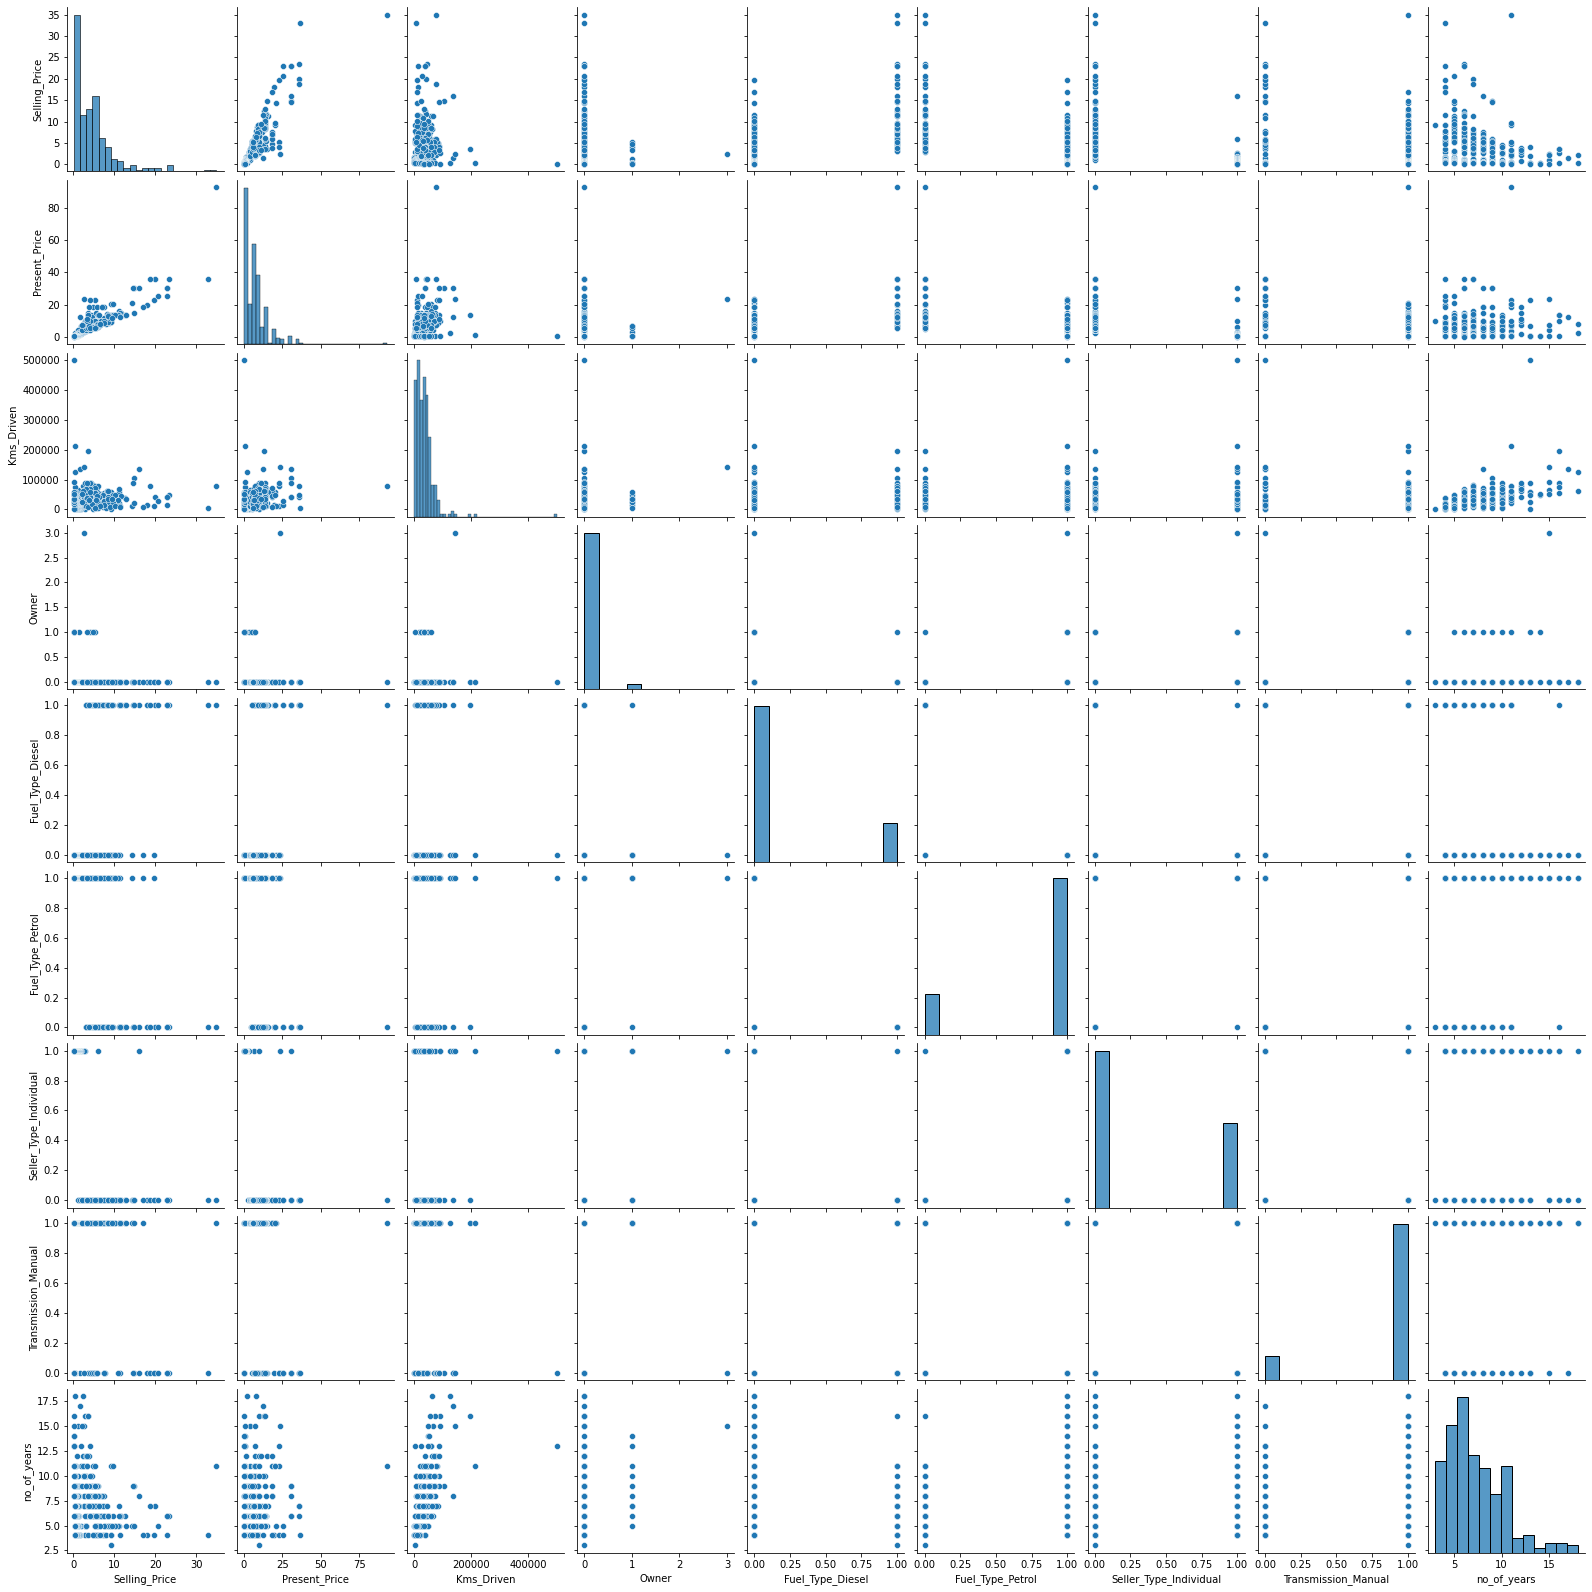

In [83]:
sb.pairplot(data=car_data)

Using boxplot for outliers

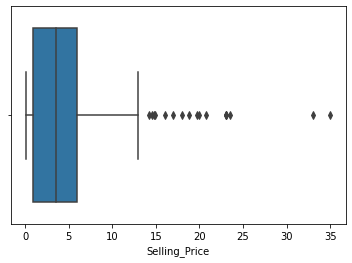

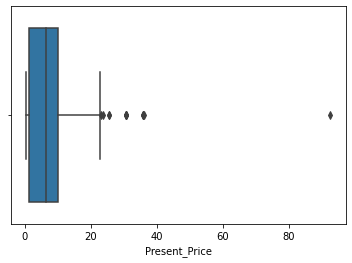

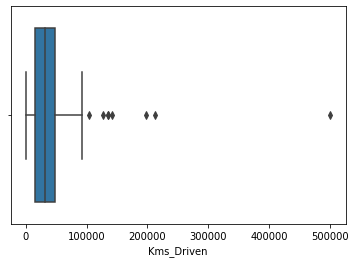

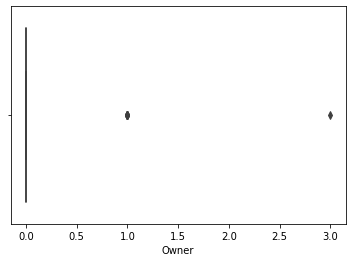

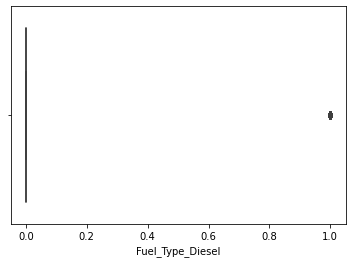

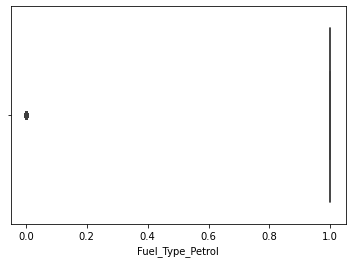

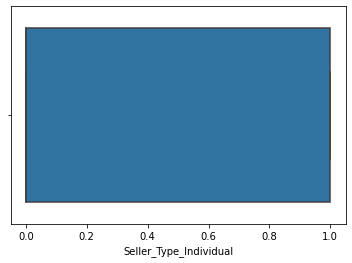

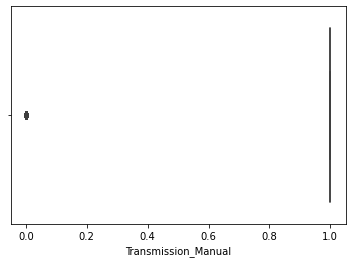

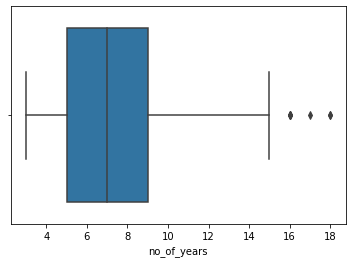

In [84]:
for i in car_data:
    plt.figure()
    sb.boxplot(x=car_data[i])

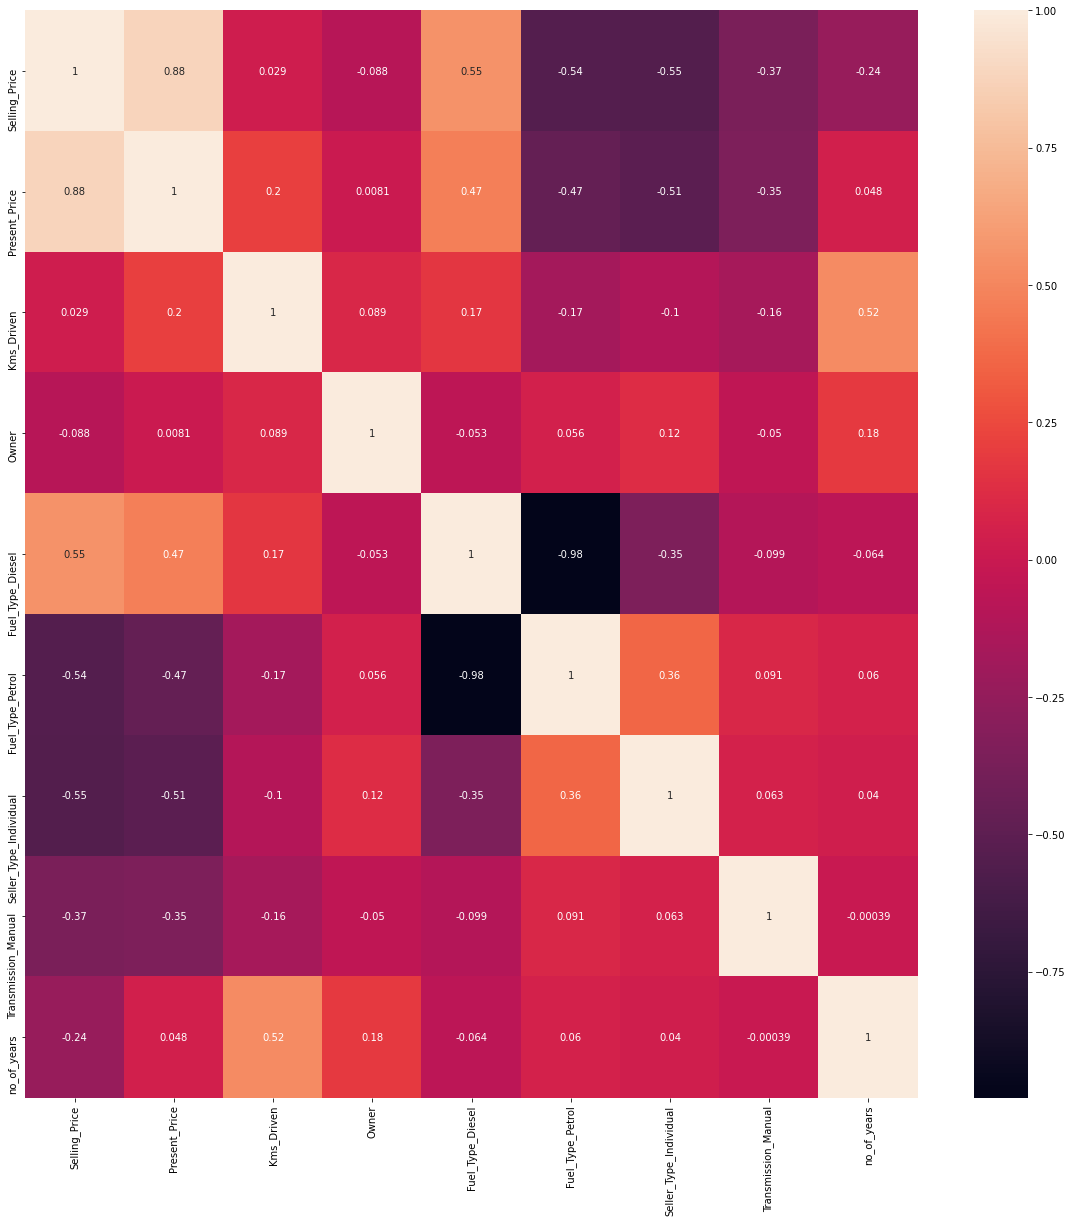

In [85]:
corr_matrix=car_data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g=sb.heatmap(car_data[top_corr_features].corr(),annot=True)

In [86]:
X=car_data.iloc[:,1:]
Y=car_data.iloc[:,0]

In [132]:
X.shape,Y.shape

((301, 8), (301,))

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

# Hyperparameter tuning

In [113]:
from sklearn.model_selection import RandomizedSearchCV


Using RandomSearchCv for hyperparameter tuning

In [114]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1300, num = 13)]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 42, num = 7)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 10]

In [115]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rfr=RandomForestRegressor()

In [118]:
rfr_rsc=RandomizedSearchCV(estimator=rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 8, verbose=2, random_state=42,n_jobs=1)

In [119]:
rfr_rsc.fit(X_train,Y_train)

Fitting 8 folds for each of 20 candidates, totalling 160 fits
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=18, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estim

[CV] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=l

[CV] END max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=24, max_featur

RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30, 36,
                                                      42],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [120]:
rfr_rsc.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 12}

In [125]:
prediction=rfr_rsc.predict(X_test)

c:\users\shiva\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

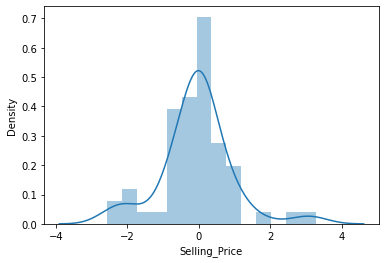

In [126]:
sb.distplot(Y_test-prediction)

Using mse for calculating error

In [130]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(Y_test, prediction))

MSE: 1.0007046981470293
